In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from numpy import mean
from numpy import absolute
from numpy import sqrt
#learning from https://github.com/jensenbenjamin/NBA_Betting_Model/blob/main/2022NBA_OverUnder.ipynb?source=post_page-----7b5195b405d2--------------------------------

In [123]:
import os
os.chdir('/Users/allisonkruse/desktop/nfl')
os.getcwd()

'/Users/allisonkruse/Desktop/nfl'

In [124]:
df = pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_Season_OU_Only_V2.csv')
df.head()

,Date,Visitor,Visitor_Score,Home,Home_Score,Total_Score,W_Team_Score,Winning_Team,h_pts_game,h_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,9/8/22,Buffalo Bills,31,Los Angeles Rams,10,41,31,Buffalo Bills,28.4,97.7,...,90.8,0.941176,0.882353,82.3,1.312500,1.062500,82.1,2.187500,0.875000,95.8
1,9/11/22,Indianapolis Colts,20,Houston Texans,20,40,20,Indianapolis Colts,17.0,86.8,...,82.7,1.176471,1.117647,76.8,1.470588,0.588235,96.2,1.000000,1.176471,79.2
2,9/11/22,San Francisco 49ers,10,Chicago Bears,19,29,19,Chicago Bears,19.2,177.3,...,94.4,1.117647,0.882353,80.3,1.176471,1.176471,82.7,1.764706,0.529412,102.3
3,9/11/22,Pittsburgh Steelers,23,Cincinnati Bengals,20,43,23,Pittsburgh Steelers,26.1,95.5,...,80.1,2.187500,0.750000,101.0,1.705882,1.176471,86.8,0.705882,0.823529,78.7
4,9/11/22,Philadelphia Eagles,38,Detroit Lions,35,73,38,Philadelphia Eagles,26.6,128.2,...,94.2,1.705882,0.411765,99.3,1.294118,1.000000,81.6,1.470588,0.529412,99.0


In [125]:
print(df.size)
print(df.shape)

10260
(285, 36)


In [126]:
print(list(df.columns))

['Date', 'Visitor', 'Visitor_Score', 'Home', 'Home_Score', 'Total_Score', 'W_Team_Score', 'Winning_Team', 'h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game', 'h_df_tds_game', 'h_df_int_game', 'h_df_passer_rate', 'h_o_tds_game', 'h_o_int_game', 'h_o_passer_rate', 'v_df_tds_game', 'v_df_int_game', 'v_df_passer_rate', 'v_o_tds_game', 'v_o_int_game', 'v_o_passer_rate']


In [127]:
features=['h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game', 'h_df_tds_game', 'h_df_int_game', 'h_df_passer_rate', 'h_o_tds_game', 'h_o_int_game', 'h_o_passer_rate', 'v_df_tds_game', 'v_df_int_game', 'v_df_passer_rate', 'v_o_tds_game', 'v_o_int_game', 'v_o_passer_rate']

In [128]:
#drop any nas 
df_without_missing_values = df.dropna()

In [129]:
#set the target 
target = df_without_missing_values['Total_Score']
target.head()

0    41
1    40
2    29
3    43
4    73
Name: Total_Score, dtype: int64

In [130]:
#how many did we lose by dropping nsa?
print(df_without_missing_values.size)
print(df_without_missing_values.shape)

10260
(285, 36)


In [131]:
X = df_without_missing_values[features]
y=target

In [132]:
len(X)

285

In [133]:
#Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest

In [134]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor
rf = RandomForestRegressor()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_predr=rf.predict(X_test)

In [135]:
mse = mean_squared_error(y_test, y_predr)
rmse = mse**.5
print(mse)
print(rmse)

202.5694789286549
14.232690502103068


In [136]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 11.543480808525045
MSE: 202.56908520529646
RMSE: 14.23267667044033


In [137]:
#version trained on whole data set 
rf_wds = RandomForestRegressor()

#Train the model using the whole data set
rf_wds.fit(X,y)

RandomForestRegressor()

## Linear Regression 

In [140]:
# linear regression
regr = LinearRegression()
 
regr.fit(X_train, y_train)
regr_predict_Test=regr.predict(X_test)
print(regr.score(X_test, y_test))

-0.12044817901432658


In [141]:

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 11.543480808525045
MSE: 202.56908520529646
RMSE: 14.23267667044033


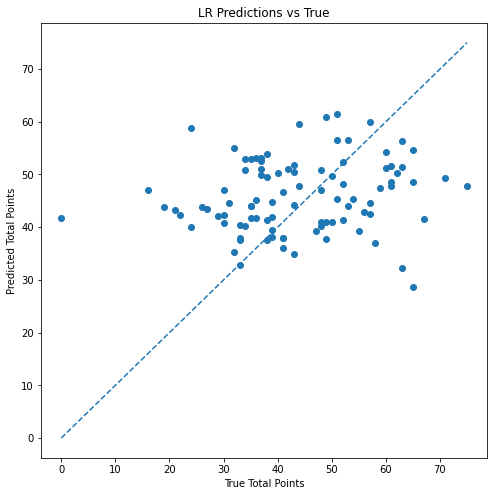

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(y_test, regr_predict_Test)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('LR Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## Linear Regression with Cross Validation

In [143]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [144]:
#view mean absolute error
print("RMSE:",sqrt(mean(absolute(scores))))

RMSE: 13.9571947219638


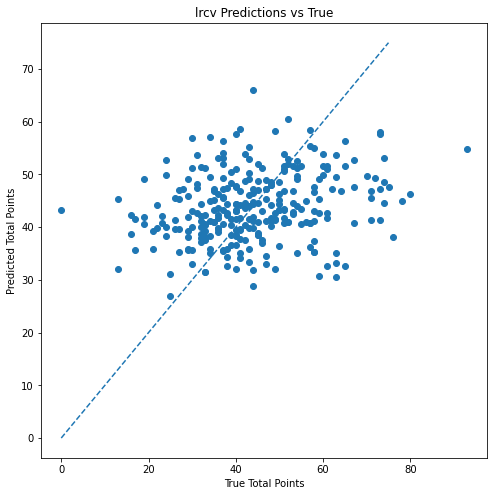

In [145]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y,
                         cv=cv, n_jobs=-1)

plt.figure(figsize=(8,8))
plt.scatter(y, predictions)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('lrcv Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## Linear Regression on Whole Data Set

In [146]:
# linear regression
regr_wds = LinearRegression()
 
regr_wds.fit(X, y)


LinearRegression()

## GradientBoostingRegressor

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB_predict_Train=GB.predict(X_train)

RMSE1=sqrt(mean_squared_error(y_train,GB_predict_Train))
print("RMSE (training) for GB:{0:10f}".format(RMSE1))

GB_predict_Test=GB.predict(X_test)

RMSE= sqrt(mean_squared_error(y_test,GB_predict_Test))
print("RMSE (Test Data) for GB:{0:10f}".format(RMSE))

RMSE (training) for GB:  5.734626
RMSE (Test Data) for GB: 15.858496


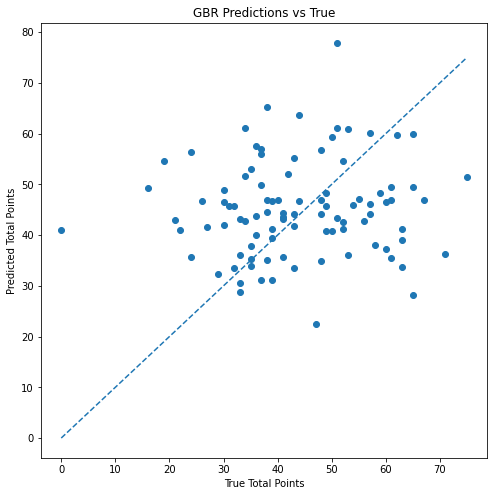

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(y_test, GB_predict_Test)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('GBR Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## Predictions Game 1 

In [149]:
#make bet 
Bet = pd.read_csv('/Users/allisonkruse/desktop/nfl/2023_game_one_v2.csv')
Bet.head()

,Date,Visitor,Home,Total_Score,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,9/7/23,Detroit Lions,Kansas City Chiefs,NaN,29.2,115.9,297.8,413.6,26.6,128.2,...,95.3,2.411765,0.705882,104.7,1.529412,0.705882,94.2,1.705882,0.411765,99.3


In [150]:
#To make predictions, the data frame needs to match the format (number of columns and column titles) of the training data.
Bet = Bet.iloc[: , 4:]

Bet.head()

,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,v_pass_yd_game,v_tt_ytd_game,h_df_pts_game,h_df_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,29.2,115.9,297.8,413.6,26.6,128.2,251.8,380,21.7,107.2,...,95.3,2.411765,0.705882,104.7,1.529412,0.705882,94.2,1.705882,0.411765,99.3


### GradientBoostingRegressor

In [151]:
GB_predict_Tonight=GB.predict(Bet)
print(GB_predict_Tonight)

[36.51639573]


### Linear Regression

In [152]:
LR_predict_Tonight=regr.predict(Bet)
print(LR_predict_Tonight)

[58.03801198]


### Linear Regression Whole Data Set 

In [153]:
LR_wds_predict_Tonight=regr_wds.predict(Bet)
print(LR_wds_predict_Tonight)

[56.44468232]


### Randon Forest

In [154]:
print(rf.predict(Bet))

[42.54]


In [155]:
#whole data set randon forest -- this one is the way to go final total was 41 points 
print(rf_wds.predict(Bet))

[42.335]


### Load in week one games

In [247]:
ft=pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_Season_Full_Team_Only.csv')
ft.head()

,Team,pts_game,rush_yd_game,pass_yd_game,tt_ytd_game,df_pts_game,df_rush_yd_game,df_pass_yd_game,df_tt_ytd_game,df_tds_game,df_int_game,df_passer_rate,o_tds_game,o_int_game,o_passer_rate
0,Kansas City Chiefs,29.2,115.9,297.8,413.6,21.7,107.2,220.9,328.2,1.941176,0.647059,95.3,2.411765,0.705882,104.7
1,Buffalo Bills,28.4,139.5,258.1,397.6,17.9,104.6,214.6,319.1,1.312500,1.062500,82.1,2.187500,0.875000,95.8
2,Philadelphia Eagles,28.1,147.6,241.5,389.1,20.2,121.6,179.8,301.5,1.294118,1.000000,81.6,1.470588,0.529412,99.0
3,Detroit Lions,26.6,128.2,251.8,380.0,25.1,146.5,245.8,392.4,1.529412,0.705882,94.2,1.705882,0.411765,99.3
4,San Francisco 49ers,26.5,138.8,226.8,365.6,16.3,77.7,222.9,300.6,1.176471,1.176471,82.7,1.764706,0.529412,102.3


In [248]:
ft_cols = ft.columns.values.tolist()
print(ft_cols)

['Team', 'pts_game', 'rush_yd_game', 'pass_yd_game', 'tt_ytd_game', 'df_pts_game', 'df_rush_yd_game', 'df_pass_yd_game', 'df_tt_ytd_game', 'df_tds_game', 'df_int_game', 'df_passer_rate', 'o_tds_game', 'o_int_game', 'o_passer_rate']


In [250]:
def make_bet_row(home_team='Kansas City Chiefs', 
                 visitor_team='Detroit Lions',
                 team_stats=None,
                 feature_names=None,
                 output_feature_order=None):
    
    if team_stats is None:
        team_stats = pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_Season_Full_Team_Only.csv')
    if feature_names is None:
        feature_names = ['pts_game', 'rush_yd_game', 'pass_yd_game', 'tt_ytd_game', 'df_pts_game', 'df_rush_yd_game', 'df_pass_yd_game', 'df_tt_ytd_game', 'df_tds_game', 'df_int_game', 'df_passer_rate', 'o_tds_game', 'o_int_game', 'o_passer_rate']
    if output_feature_order is None:
        output_feature_order = features #['h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game']

    home_row = team_stats.loc[team_stats['Team'] == home_team][feature_names].reset_index(drop=True)# needed lower down
    visitor_row = team_stats.loc[team_stats['Team'] == visitor_team][feature_names].reset_index(drop=True)

    joint_row = pd.concat([home_row, visitor_row], axis=1, ignore_index=True)
    joint_row.columns = [f'h_{i}' for i in feature_names] + [f'v_{i}' for i in feature_names]
    return joint_row[output_feature_order]

In [251]:
row=make_bet_row()

In [252]:
row

,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,v_pass_yd_game,v_tt_ytd_game,h_df_pts_game,h_df_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,29.2,115.9,297.8,413.6,26.6,128.2,251.8,380.0,21.7,107.2,...,95.3,2.411765,0.705882,104.7,1.529412,0.705882,94.2,1.705882,0.411765,99.3


In [253]:
rf_wds.predict(row)

array([42.335])

## Need to get schedule data together

In [218]:
#get schedule
sched = pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_schedule.csv')
sched.head()

,week,away_team,home_team
0,Week 1,Detroit Lions,Kansas City Chiefs
1,Week 1,Arizona Cardinals,Washington Commanders
2,Week 1,Carolina Panthers,Atlanta Falcons
3,Week 1,Cincinnati Bengals,Cleveland Browns
4,Week 1,Houston Texans,Baltimore Ravens


In [219]:
cols = sched.columns.values.tolist()
print(cols)

['week', 'away_team', 'home_team']


In [220]:
sched[cols] = sched[cols].apply(lambda x: x.str.strip())

In [221]:
sched.head()

,week,away_team,home_team
0,Week 1,Detroit Lions,Kansas City Chiefs
1,Week 1,Arizona Cardinals,Washington Commanders
2,Week 1,Carolina Panthers,Atlanta Falcons
3,Week 1,Cincinnati Bengals,Cleveland Browns
4,Week 1,Houston Texans,Baltimore Ravens


In [222]:
print(sched.shape)

(150, 3)


In [223]:
#week 1 not sure why my other stripping isnt working
#matchups = sched[(sched['week'].str.strip() == "Week 1")]-- strip earlier now 
matchups = sched[(sched.week == "Week 1")]

In [224]:
print(matchups)

      week             away_team              home_team
0   Week 1         Detroit Lions     Kansas City Chiefs
1   Week 1     Arizona Cardinals  Washington Commanders
2   Week 1     Carolina Panthers        Atlanta Falcons
3   Week 1    Cincinnati Bengals       Cleveland Browns
4   Week 1        Houston Texans       Baltimore Ravens
5   Week 1  Jacksonville Jaguars     Indianapolis Colts
6   Week 1   San Francisco 49ers    Pittsburgh Steelers
7   Week 1  Tampa Bay Buccaneers      Minnesota Vikings
8   Week 1      Tennessee Titans     New Orleans Saints
9   Week 1     Green Bay Packers          Chicago Bears
10  Week 1     Las Vegas Raiders         Denver Broncos
11  Week 1      Los Angeles Rams       Seattle Seahawks
12  Week 1        Miami Dolphins   Los Angeles Chargers
13  Week 1   Philadelphia Eagles   New England Patriots
14  Week 1        Dallas Cowboys        New York Giants
15  Week 1         Buffalo Bills          New York Jets


In [225]:
matchups=matchups.drop(columns=["week"])

In [226]:
print(matchups)

               away_team              home_team
0          Detroit Lions     Kansas City Chiefs
1      Arizona Cardinals  Washington Commanders
2      Carolina Panthers        Atlanta Falcons
3     Cincinnati Bengals       Cleveland Browns
4         Houston Texans       Baltimore Ravens
5   Jacksonville Jaguars     Indianapolis Colts
6    San Francisco 49ers    Pittsburgh Steelers
7   Tampa Bay Buccaneers      Minnesota Vikings
8       Tennessee Titans     New Orleans Saints
9      Green Bay Packers          Chicago Bears
10     Las Vegas Raiders         Denver Broncos
11      Los Angeles Rams       Seattle Seahawks
12        Miami Dolphins   Los Angeles Chargers
13   Philadelphia Eagles   New England Patriots
14        Dallas Cowboys        New York Giants
15         Buffalo Bills          New York Jets


## Make Predictions 

In [231]:
matchups_test = matchups[(matchups.away_team  == "Arizona Cardinals")]
print(matchups_test)

           away_team              home_team
1  Arizona Cardinals  Washington Commanders


In [267]:
def make_bet_row(home_team='Washington Commanders', 
                 visitor_team='Arizona Cardinals',
                 team_stats=None,
                 feature_names=None,
                 output_feature_order=None):
    
    if team_stats is None:
        team_stats = pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_Season_Full_Team_Only.csv')
    if feature_names is None:
        feature_names = ['pts_game', 'rush_yd_game', 'pass_yd_game', 'tt_ytd_game', 'df_pts_game', 'df_rush_yd_game', 'df_pass_yd_game', 'df_tt_ytd_game', 'df_tds_game', 'df_int_game', 'df_passer_rate', 'o_tds_game', 'o_int_game', 'o_passer_rate']
    if output_feature_order is None:
        output_feature_order = features #['h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game']

    home_row = team_stats.loc[team_stats['Team'] == home_team][feature_names].reset_index(drop=True)
    visitor_row = team_stats.loc[team_stats['Team'] == visitor_team][feature_names].reset_index(drop=True)

    joint_row = pd.concat([home_row, visitor_row], axis=1, ignore_index=True)
    joint_row.columns = [f'h_{i}' for i in feature_names] + [f'v_{i}' for i in feature_names]
    return joint_row[output_feature_order]

In [268]:
row=make_bet_row()
make_bet_row()

,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,v_pass_yd_game,v_tt_ytd_game,h_df_pts_game,h_df_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,18.9,126.1,204.2,330.3,20.0,110.2,213.3,323.5,20.2,113.3,...,90.2,1.411765,0.941176,84.7,1.705882,0.647059,98.2,1.0,1.0,79.2


In [276]:
print(rf_wds.predict(row),"Cardinals Commanders")

[36.08] Cardinals Commanders


In [ ]:
##successfully making rows with correct data but can't quite figure out how to have the schedule flow through 

In [270]:
#recommendation from my ML mentor below 
#matchups = [[team1, team2], ...] --need an array of match ups 
predictions = []
for matchup in matchups:
    home_team, away_team = matchup
    bet_row = make_bet_row(home_team, away_team)
    prediction = rf_wds.predict(bet_row)
    predictions.append(prediction)

ValueError: too many values to unpack (expected 2)